# What is the best plan?

## Step 1 - Open the data file and study the general information

## importing the libraries

In [73]:
from functools import reduce
from scipy import stats as st 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the datasets

In [74]:
df_calls = pd.read_csv("D:\Tripleten\Projects\Sprint-4-Statistical-Data-Analysis\data\megaline_calls.csv", sep=',')
df_internet = pd.read_csv("D:\Tripleten\Projects\Sprint-4-Statistical-Data-Analysis\data\megaline_internet.csv", sep=',')
df_messages = pd.read_csv("D:\Tripleten\Projects\Sprint-4-Statistical-Data-Analysis\data\megaline_messages.csv", sep=',')
df_plans = pd.read_csv("D:\Tripleten\Projects\Sprint-4-Statistical-Data-Analysis\data\megaline_plans.csv", sep=',') 
df_users = pd.read_csv("D:\Tripleten\Projects\Sprint-4-Statistical-Data-Analysis\data\megaline_users.csv", sep=',') 

 ## Step 2 - Data Overview

### DataFrame Plans

In [75]:
df_plans.info()
print()
df_plans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Note
- I will convert the columns `usd_monthly_pay` and `usd_per_gb` to float type and I will convert the data from GB to MB.

In [76]:
df_plans['usd_monthly_pay'] = df_plans['usd_monthly_pay'].astype(float)
df_plans['usd_per_gb'] = df_plans['usd_per_gb'].astype(float)

In [77]:
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024.0

### DataFrame Users

In [78]:
df_users.info()
print()
df_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Note
- I will transform the columns `reg_date` and `churn_date` to datetime type.

In [79]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['reg_date'].head()

0   2018-12-24
1   2018-08-13
2   2018-10-21
3   2018-01-28
4   2018-05-23
Name: reg_date, dtype: datetime64[ns]

In [80]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
df_users['churn_date'].sample(5)

132   NaT
241   NaT
211   NaT
70    NaT
61    NaT
Name: churn_date, dtype: datetime64[ns]

### Dataframe Calls

In [81]:
df_calls.info()
print()
df_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB



,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Note
- Here I will also transform the `call_date` column to date time and month format. In this DataFra we also have no missing values.

In [82]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls['call_date'].head()

0   2018-12-27
1   2018-12-27
2   2018-12-27
3   2018-12-28
4   2018-12-30
Name: call_date, dtype: datetime64[ns]

In [83]:
df_calls['year_month'] = df_calls['call_date'].dt.to_period('M')
df_calls['year_month'].head()

0    2018-12
1    2018-12
2    2018-12
3    2018-12
4    2018-12
Name: year_month, dtype: period[M]

### DataFrame Messages

In [84]:
df_messages.info()
print()
df_messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB



,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Note
- Here I will also transform the `message_date` column to the date time format and to the month. In this df we also have no missing values.

In [85]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages['message_date'].head()

0   2018-12-27
1   2018-12-31
2   2018-12-31
3   2018-12-27
4   2018-12-26
Name: message_date, dtype: datetime64[ns]

In [86]:
df_messages['year_month'] = df_messages['message_date'].dt.to_period('M')
df_messages['year_month'].head()

0    2018-12
1    2018-12
2    2018-12
3    2018-12
4    2018-12
Name: year_month, dtype: period[M]

### DataFrame Internet

In [87]:
df_internet.info()
print()
df_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB



,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Note
- Once again I will transform the `session_date` column to date time format.And I'm also going to change the column `gb_used` from GB to MB . Here we also have no missing values.

In [88]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], errors='coerce')
df_internet['session_date'].head()

0   2018-12-29
1   2018-12-31
2   2018-12-28
3   2018-12-26
4   2018-12-27
Name: session_date, dtype: datetime64[ns]

In [89]:
df_internet['year_month'] = df_internet['session_date'].dt.to_period('M')
df_internet['year_month'].head()

0    2018-12
1    2018-12
2    2018-12
3    2018-12
4    2018-12
Name: year_month, dtype: period[M]

In [90]:
df_internet['gb_used'] = df_internet['mb_used'] / 1024.0

---

## Study the conditions of the plans

It is essential to understand how the plans work, that is, how users are charged based on their subscription. We suggest printing out the plan information to review the terms and conditions.

In [91]:
# Print out the plan terms and conditions and make sure they make sense to you.
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30.0


## Aggregate data by user

### Now that the data is clean, aggregate it by user and by period to have only one record of this information. This will make future analyses much easier.

In [117]:
# Calculate the number of calls made by each user per month. Save the result.
calls_monthly = df_calls.groupby(['user_id', 'year_month'])['id'].count().reset_index(name='call_count')
calls_monthly.head()

,user_id,year_month,call_count
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64


In [116]:
# Calculate the number of minutes spent by each user per month. Save the result.
minutes_monthly = df_calls.groupby(['user_id', 'year_month'])['duration'].sum().reset_index(name='call_duration')
minutes_monthly.head()

,user_id,year_month,call_duration
0,1000,2018-12,116.83
1,1001,2018-08,171.14
2,1001,2018-09,297.69
3,1001,2018-10,374.11
4,1001,2018-11,404.59


In [115]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_monthly = df_messages.groupby(['user_id', 'year_month'])['message_date'].count().reset_index(name='message_count')
messages_monthly.head()

,user_id,year_month,message_count
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


In [118]:
# Calculate the amount of internet traffic used by each user per month. Save the result.
internet_monthly = df_internet.groupby(['user_id', 'year_month'])['gb_used'].sum().reset_index(name='internet_used')
internet_monthly.head()

,user_id,year_month,internet_used
0,1000,2018-12,1.856904
1,1001,2018-08,6.756982
2,1001,2018-09,13.002754
3,1001,2018-10,21.807119
4,1001,2018-11,18.070605


### Put the aggregated data into a DataFrame so that each record in it represents what each user consumed in a given month.

In [119]:
# Merge call, minutes, messages and internet data based on user_id and month
dataframes = [calls_monthly, minutes_monthly, messages_monthly, internet_monthly]
all_data = reduce(lambda left, right: pd.merge(left, right, on=['user_id', 'year_month'], how='outer'), dataframes)

# Filling in the null values.
all_data['message_count'] = all_data['message_count'].fillna(0)
all_data['internet_used'] = all_data['internet_used'].fillna(0)
all_data['call_duration'] = all_data['call_duration'].fillna(0)
all_data['call_count'] = all_data['call_count'].fillna(0)
all_data.head()

,user_id,year_month,call_count,call_duration,message_count,internet_used
0,1000,2018-12,16.0,116.83,11.0,1.856904
1,1001,2018-08,27.0,171.14,30.0,6.756982
2,1001,2018-09,49.0,297.69,44.0,13.002754
3,1001,2018-10,65.0,374.11,53.0,21.807119
4,1001,2018-11,64.0,404.59,36.0,18.070605


In [97]:
# Merging the users and plan DataFrames

# renaming the columns
df_plans.rename(columns={'plan_name': 'plan'}, inplace=True)

final_data = pd.merge(all_data,df_users, on=['user_id'], how='left')
final_data = pd.merge(final_data, df_plans, on=['plan'], how='left')
final_data.head()

,user_id,year_month,call_count,call_duration,message_count,internet_used,first_name,last_name,age,city,...,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,2018-12,16.0,116.83,11.0,1.856904,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,NaT,1000,30720,3000,70.0,7.0,0.01,0.01,30.0
1,1001,2018-08,27.0,171.14,30.0,6.756982,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaT,50,15360,500,20.0,10.0,0.03,0.03,15.0
2,1001,2018-09,49.0,297.69,44.0,13.002754,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaT,50,15360,500,20.0,10.0,0.03,0.03,15.0
3,1001,2018-10,65.0,374.11,53.0,21.807119,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaT,50,15360,500,20.0,10.0,0.03,0.03,15.0
4,1001,2018-11,64.0,404.59,36.0,18.070605,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaT,50,15360,500,20.0,10.0,0.03,0.03,15.0


### Calculate the monthly income for each user: 
- subtract the free limit of the package from the total number of calls, text messages and data; 
- multiply the result by the plan value; 
- add the monthly price depending on the plan.

In [98]:
# Calculate monthly revenue for each user
final_data['due'] = final_data['usd_monthly_pay']

# Revenue for calls
final_data['due_call'] = final_data['call_duration'] - final_data['minutes_included']
final_data['due_call'] = final_data['due_call'] * final_data['usd_per_minute']
# Replacing negative values
final_data.loc[final_data['due_call'] < 0, "due_call"] = 0

# Revenue for messages
final_data['due_msg'] = final_data['message_count'] - final_data['messages_included']
final_data['due_msg'] = final_data['due_msg'] * final_data['usd_per_message']
final_data.loc[final_data['due_msg'] < 0, "due_msg"] = 0

# Revenue for internet
final_data['due_internet'] = final_data['internet_used'] - final_data['gb_per_month_included']
final_data['due_internet'] = final_data['due_internet'] * final_data['usd_per_gb']
final_data.loc[final_data['due_internet'] < 0, "due_internet"] = 0

# Final revenue
final_data['due_total'] = final_data['due'] + final_data['due_call'] + final_data['due_msg'] + final_data['due_internet']

final_data[['due_call', 'due_msg', 'due_internet', 'due_total','churn_date', 'plan']].sample(5)

,due_call,due_msg,due_internet,due_total,churn_date,plan
1329,5.3982,0.00,159.451855,184.850055,NaT,surf
2238,0.0000,0.00,0.000000,70.000000,NaT,ultimate
705,7.8465,0.00,98.277637,126.124137,NaT,surf
1095,0.0000,0.00,2.977246,22.977246,NaT,surf
827,2.9511,2.07,167.875781,192.896881,2018-11-29,surf


In [99]:
final_data.isna().count()

user_id                  2293
year_month               2293
call_count               2293
call_duration            2293
message_count            2293
internet_used            2293
first_name               2293
last_name                2293
age                      2293
city                     2293
reg_date                 2293
plan                     2293
churn_date               2293
messages_included        2293
mb_per_month_included    2293
minutes_included         2293
usd_monthly_pay          2293
usd_per_gb               2293
usd_per_message          2293
usd_per_minute           2293
gb_per_month_included    2293
due                      2293
due_call                 2293
due_msg                  2293
due_internet             2293
due_total                2293
dtype: int64

---

## Step 3 - Study user behavior

Calculate some useful descriptive statistics for the aggregated data, which usually reveal the overall picture captured by the data. Draw useful graphs to aid understanding. Since the main task is to compare plans and decide which is more cost-effective, the statistics and graphs should be calculated on a per-plan basis.

## Calls

### Compare the average call duration for each plan for each month. Create a bar chart to visualize the result.

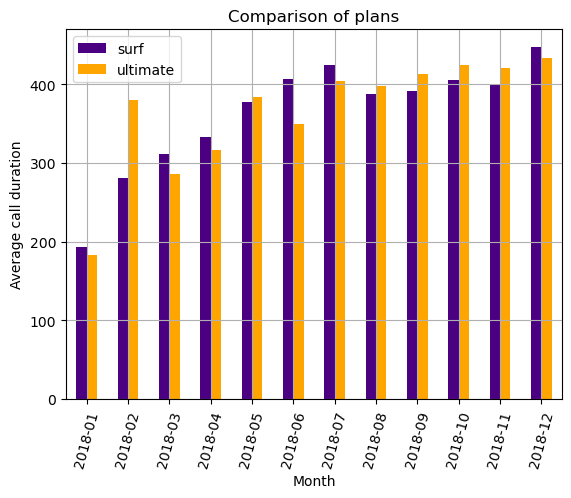

In [ ]:
# Filtering groups by plan
surf = final_data[final_data['plan'] == 'surf']
ultimate = final_data[final_data['plan'] == 'ultimate']

# Frequency
freq_call_surf = surf.groupby('year_month')['call_duration'].mean()
freq_call_ultimate = ultimate.groupby('year_month')['call_duration'].mean()

# Creating a new DataFrame to plot the graph
mean_call = pd.DataFrame({'surf': freq_call_surf, 'ultimate': freq_call_ultimate})
mean_call

# Graph
mean_call.plot(title='Comparison of plans',
                               xlabel='Month',
                               ylabel='Average call duration',
                               rot=75,
                               grid=('--'),
                               kind='bar',
                               color= ['indigo', 'orange'])

plt.legend(['surf', 'ultimate'])
plt.show()


### Compare the number of minutes users of each plan need each month. Construct a histogram.

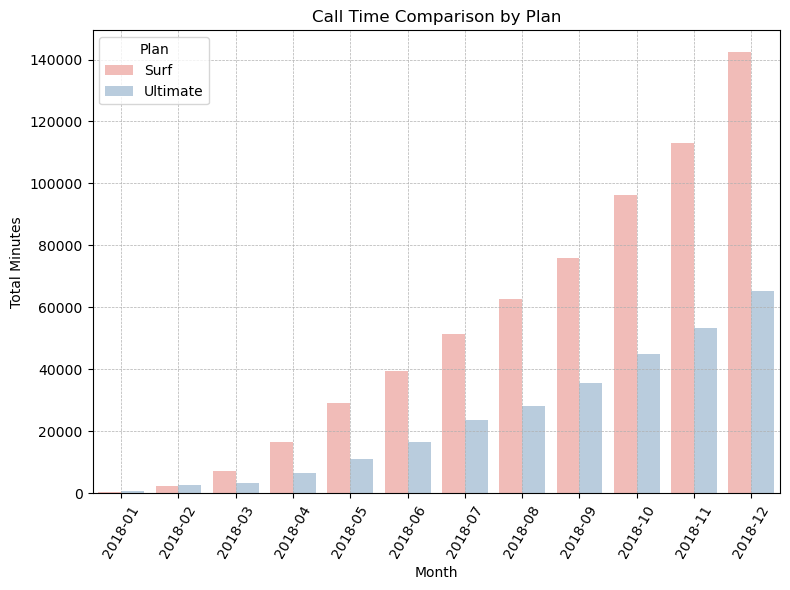

In [101]:
# Filtering groups by plan
surf = final_data[final_data['plan'] == 'surf']
ultimate = final_data[final_data['plan'] == 'ultimate']

# Frequency
freq_surf = surf.groupby(surf['year_month'])['call_duration'].sum().reset_index()
freq_surf['plan'] = 'Surf'

freq_ultimate = ultimate.groupby(ultimate['year_month'])['call_duration'].sum().reset_index()
freq_ultimate['plan'] = 'Ultimate'

# Concatenate DataFrames
sum_minutes = pd.concat([freq_surf, freq_ultimate])

# Gráfico
plt.figure(figsize=(8, 6))
sns.barplot(data=sum_minutes, x='year_month', y='call_duration', hue='plan', palette='Pastel1')

plt.title('Call Time Comparison by Plan')
plt.xlabel('Month')
plt.ylabel('Total Minutes')
plt.xticks(rotation=60)
plt.grid(visible=True, linestyle='--', linewidth=0.5)

plt.legend(title='Plan')
plt.tight_layout()
plt.show()

### Calculate the mean and variance of call duration to reflect whether users on each plan have different behaviors regarding calls.

In [120]:
# Calculating the average of the calls
mean_minutes_surf = final_data[final_data['plan'] == 'surf']['call_duration'].mean()
mean_minutes_ultimate = final_data[final_data['plan'] == 'ultimate']['call_duration'].mean()

# Calculating variance
var_minutes_surf = final_data[final_data['plan'] == 'surf']['call_duration'].var()
var_minutes_ultimate = final_data[final_data['plan'] == 'ultimate']['call_duration'].var()

# Calculating the standard deviation
std_minutes_surf = final_data[final_data['plan'] == 'surf']['call_duration'].std()
std_minutes_ultimate = final_data[final_data['plan'] == 'ultimate']['call_duration'].std()

print("Average surf plan minutes", mean_minutes_surf)
print("Average ultimate plan minutes", mean_minutes_ultimate)
print()
print("Surf plan variance", var_minutes_surf)
print("Ultimate plan variance", var_minutes_ultimate)
print()
print("Standard deviation of the surf plan", std_minutes_surf)
print("Standard deviation of the ultimate plan", std_minutes_ultimate)

Average surf plan minutes 404.76239033693577
Average ultimate plan minutes 406.19308333333333

Surf plan variance 49135.104890720366
Ultimate plan variance 51640.97140216272

Standard deviation of the surf plan 221.66439698499252
Standard deviation of the ultimate plan 227.24649920771657


### Make a box plot to visualize the distribution of monthly call durations

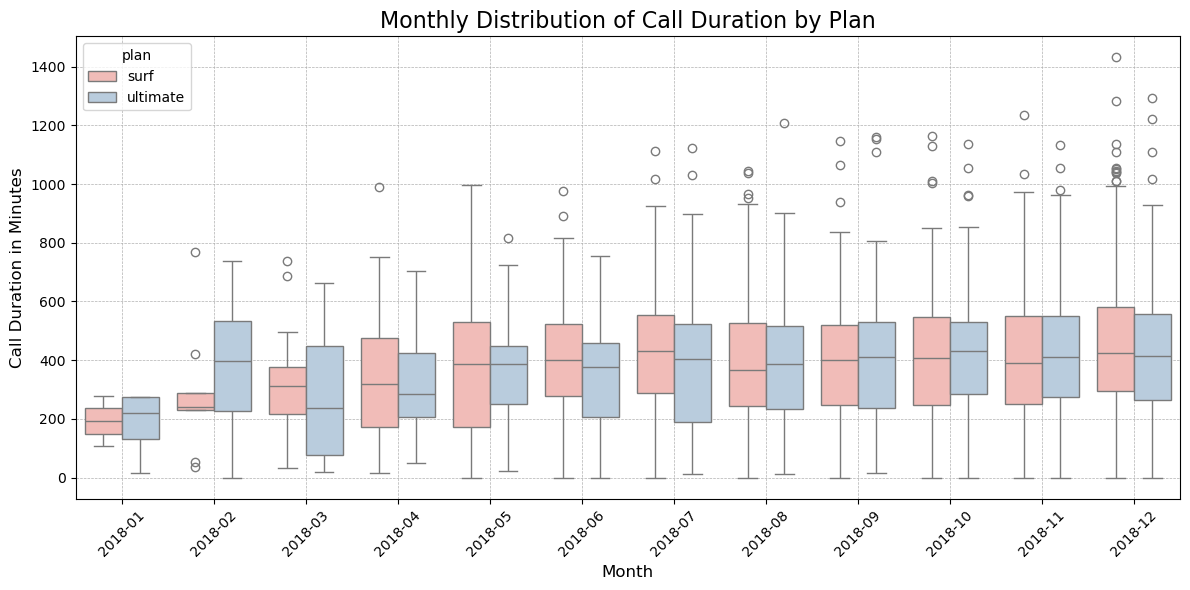

In [ ]:
#  Grouping and organizing values
grafico_call = final_data.groupby(['user_id', 'year_month','plan'])['call_duration'].sum().reset_index()
grafico_call = grafico_call.sort_values(['year_month', 'user_id'])

plt.figure(figsize = (12, 6))
sns.boxplot(x='year_month', y='call_duration', hue='plan', data=grafico_call, palette='Pastel1')
plt.title('Monthly Distribution of Call Duration by Plan', fontsize = 16)
plt.xlabel('Month', fontsize = 12)
plt.xticks(rotation = 45)
plt.ylabel('Call Duration in Minutes', fontsize = 12)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Note
- We can see that users who have the Surf plan tend to consume more minutes than their plan offers.

---

## Messages
### Compare the number of messages users on each plan typically send each month

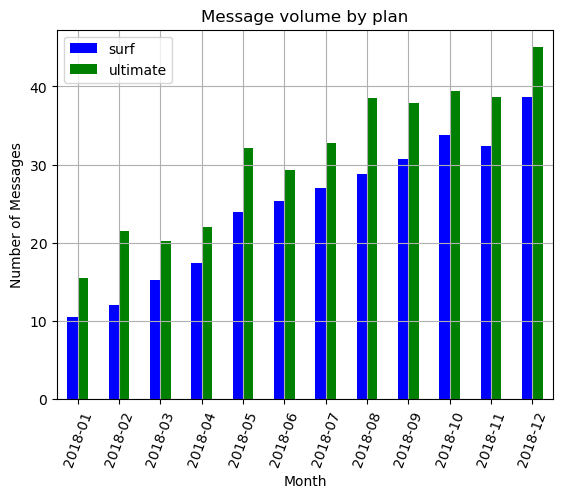

In [ ]:
# Grouping by plane
surf = final_data[final_data['plan'] == 'surf']
ultimate = final_data[final_data['plan'] == 'ultimate']

# Frequency
freq_msg_surf = surf.groupby(surf['year_month'])['message_count'].mean()
freq_msg_ultimate = ultimate.groupby(ultimate['year_month'])['message_count'].mean()

# Creating a new DataFrame to plot the graph
mean_msg = pd.DataFrame({'surf': freq_msg_surf, 'ultimate': freq_msg_ultimate})
mean_msg

# Graph
mean_msg.plot(title='Message volume by plan',
                               xlabel='Month',
                               ylabel='Number of Messages',
                               rot=70,
                               kind='bar',
                               grid=('--'),
                               color= ['blue', 'green'])

plt.legend(['surf', 'ultimate'])
plt.show()


Note
- In this case we can see that users who pay for the Ultimate plan use more messages compared to the Surf plan.

### Make a box plot to visualize monthly message consumption

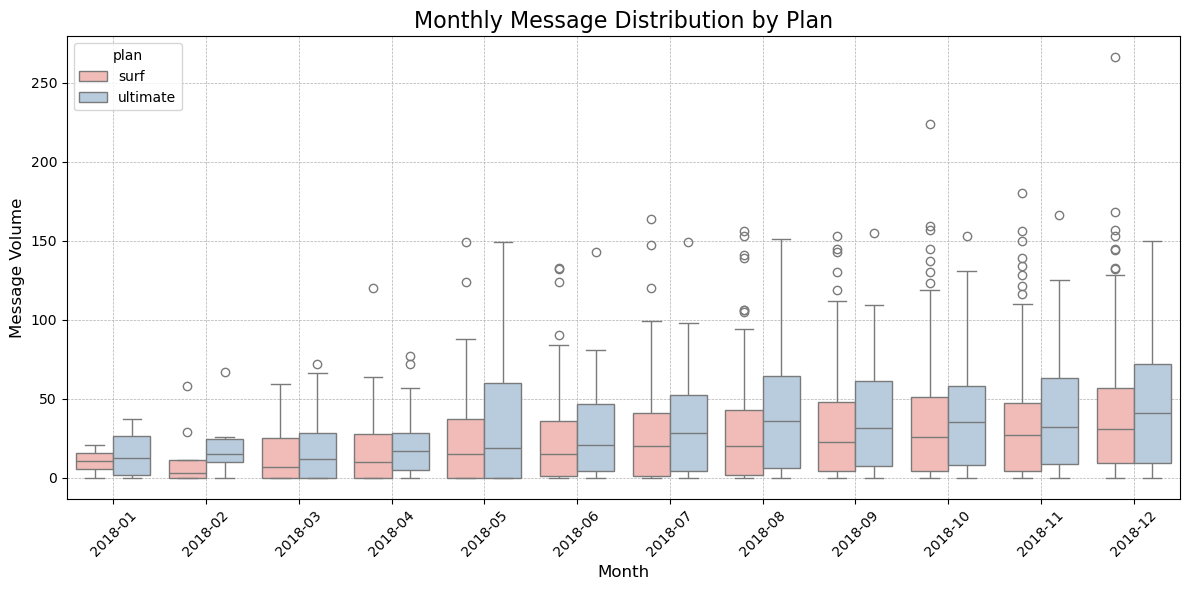

In [ ]:
# Grouping and organizing values
grafico_mensagens = final_data.groupby(['user_id', 'year_month','plan'])['message_count'].mean().reset_index()
grafico_mensagens = grafico_mensagens.sort_values(['year_month', 'user_id'])

plt.figure(figsize = (12, 6))
sns.boxplot(x='year_month', y='message_count', hue='plan', data=grafico_mensagens, palette='Pastel1')
plt.title('Monthly Message Distribution by Plan', fontsize = 16)
plt.xlabel('Month', fontsize = 12)
plt.xticks(rotation = 45)
plt.ylabel('Message Volume', fontsize = 12)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

---

## Internet
### Compare the amount of internet traffic consumed by users by plan

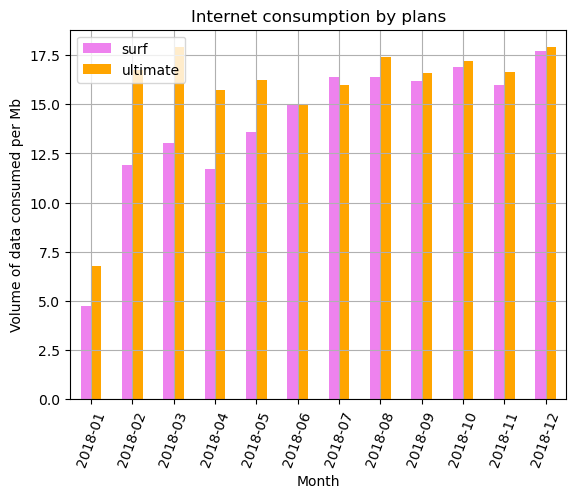

In [ ]:
# Filtering groups by plan
surf = final_data[final_data['plan'] == 'surf']
ultimate = final_data[final_data['plan'] == 'ultimate']

# Frequency
freq_internet_surf = surf.groupby(surf['year_month'])['internet_used'].mean()
freq_internet_ultimate = ultimate.groupby(ultimate['year_month'])['internet_used'].mean()

# Creating a new DataFrame to plot the graph
mean_internet = pd.DataFrame({'surf': freq_internet_surf, 'ultimate': freq_internet_ultimate})
mean_internet

# Grph
mean_internet.plot(title='Internet consumption by plans',
                               xlabel='Month',
                               ylabel='Volume of data consumed per Mb',
                               rot=70,
                               kind='bar',
                               grid=('--'),
                               color= ['violet', 'orange'])

plt.legend(['surf', 'ultimate'])
plt.show()

Note
- We can also see greater internet consumption for the Ultimate plan, but the surf plan tends to consume more data than what is paid for in the plan.

###  Make a box plot to visualize your monthly internet consumption

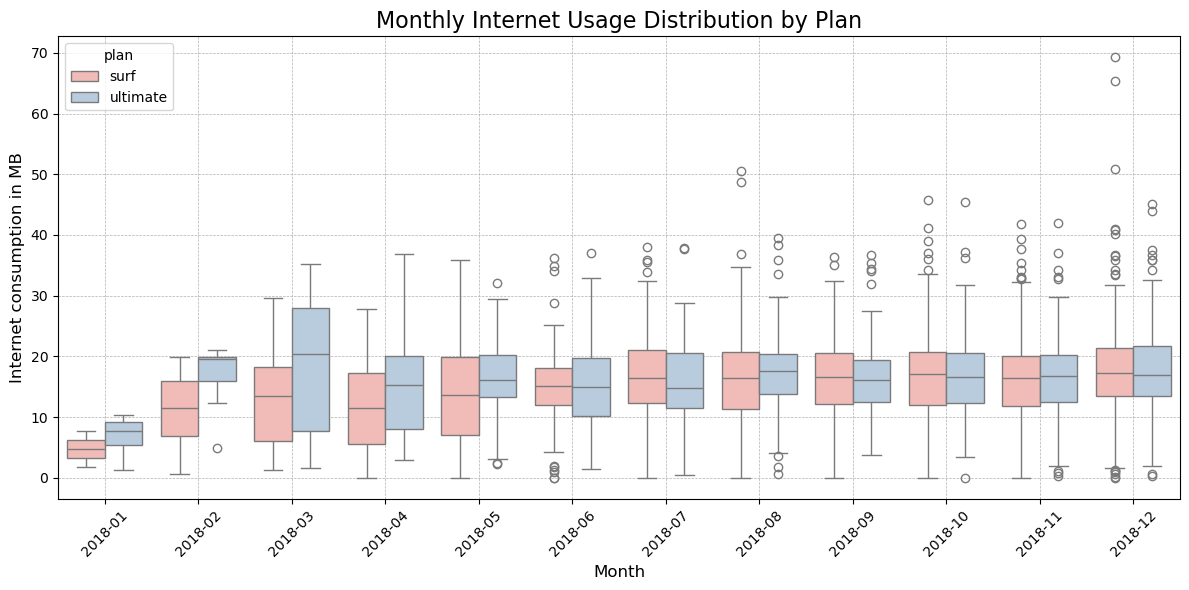

In [ ]:
# Grouping and organizing values
grafico_internet = final_data.groupby(['user_id', 'year_month','plan'])['internet_used'].sum().reset_index()
grafico_internet = grafico_internet.sort_values(['year_month', 'user_id'])

# Graph
plt.figure(figsize = (12, 6))
sns.boxplot(x='year_month', y='internet_used', hue='plan', data=grafico_internet, palette='Pastel1')
plt.title('Monthly Internet Usage Distribution by Plan', fontsize = 16)
plt.xlabel('Month', fontsize = 12)
plt.xticks(rotation = 45)
plt.ylabel('Internet consumption in MB', fontsize = 12)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## Revenue

In the same way that you studied user behavior, statistically describe the plans' revenues.

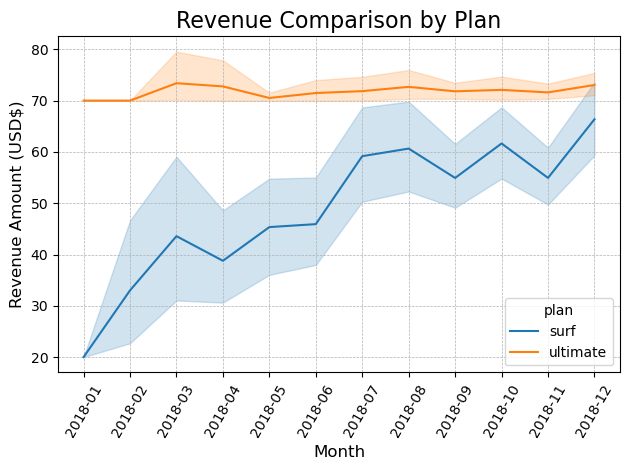

In [108]:
# Transforming the column into a string
final_data['year_month'] = final_data['year_month'].astype(str)

# Organizing in ascending order
final_data = final_data.sort_values(by='year_month')

# Graph
sns.lineplot(data=final_data, x='year_month', y='due_total', hue='plan');

plt.title('Revenue Comparison by Plan', fontsize = 16)
plt.xlabel('Month', fontsize = 12)
plt.xticks(rotation = 90)
plt.ylabel('Revenue Amount (USD$)', fontsize = 12)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.xticks(rotation = 60)
plt.tight_layout()
plt.show()

Note
- We have observed that customers who pay for the Ultimate plan tend to consume what they pay for the plan and do not exceed the limits.
Customers who pay for the Surf plan tend to consume more than they pay for the plan, they mainly use the internet and end up generating a very high value.

### Make a box plot to visualize the monthly revenue for each plan

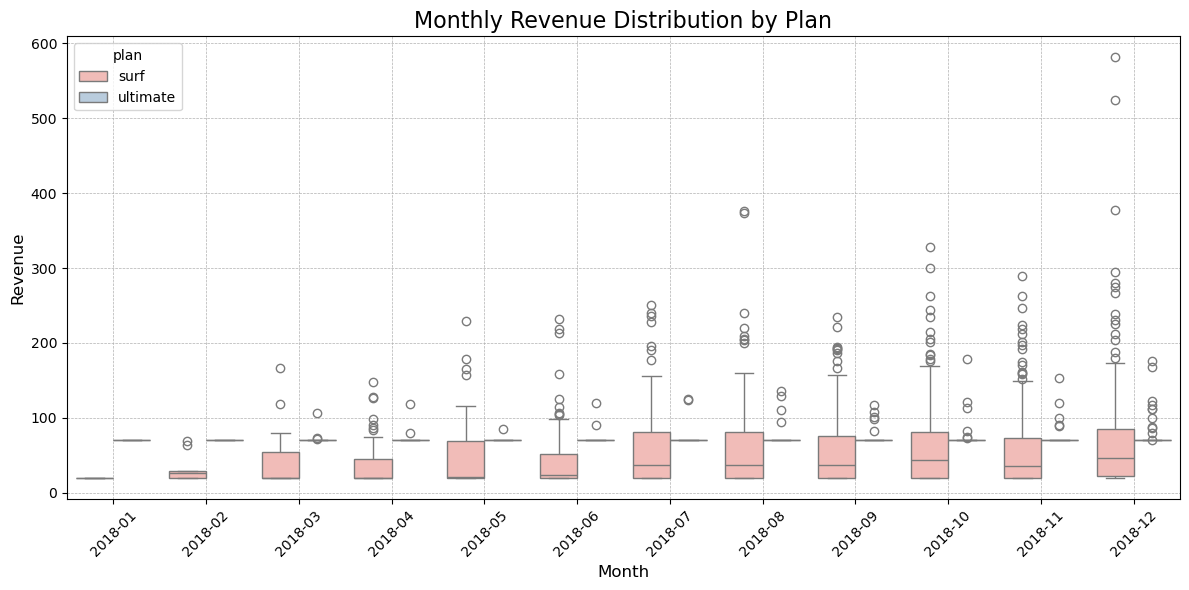

In [ ]:
# Grouping and organizing values
grafico_receita = final_data.groupby(['user_id', 'year_month','plan'])['due_total'].mean().reset_index()
grafico_receita = grafico_receita.sort_values(['year_month', 'user_id'])

# Graph
plt.figure(figsize = (12, 6))
sns.boxplot(x='year_month', y='due_total', hue='plan', data=grafico_receita, palette='Pastel1')
plt.title('Monthly Revenue Distribution by Plan', fontsize = 16)
plt.xlabel('Month', fontsize = 12)
plt.xticks(rotation = 45)
plt.ylabel('Revenue', fontsize = 12)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### Make a box plot to visualize the monthly internet revenue for each plan

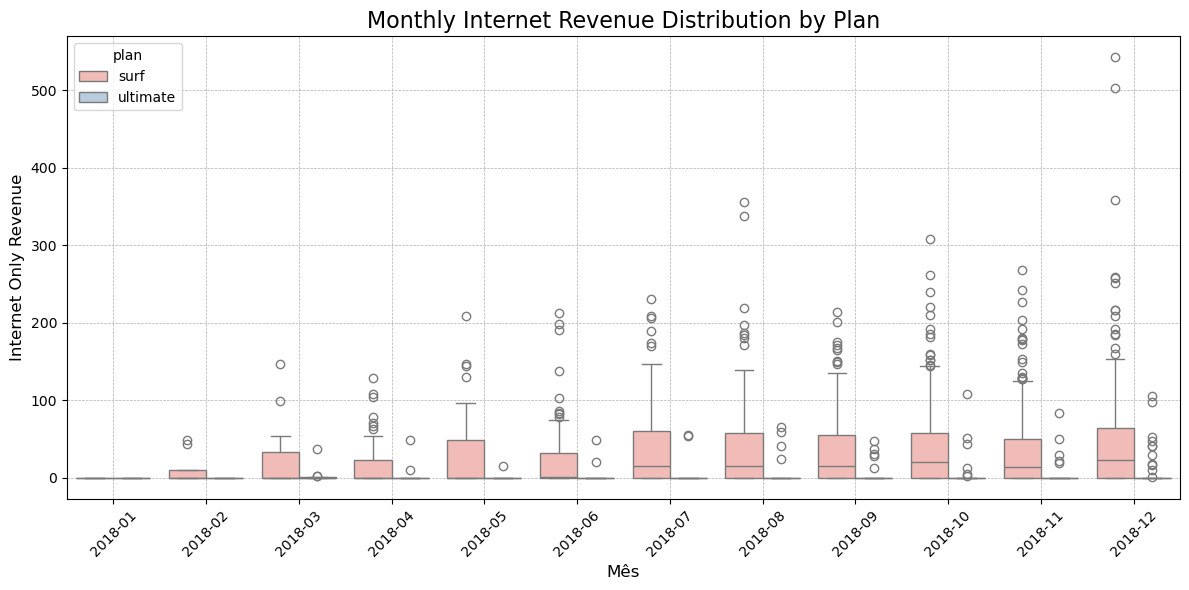

In [ ]:
# Grouping and organizing values
grafico_receita = final_data.groupby(['user_id', 'year_month','plan'])['due_internet'].mean().reset_index()
grafico_receita = grafico_receita.sort_values(['year_month', 'user_id'])

# Graph
plt.figure(figsize = (12, 6))
sns.boxplot(x='year_month', y='due_internet', hue='plan', data=grafico_receita, palette='Pastel1')
plt.title('Monthly Internet Revenue Distribution by Plan', fontsize = 16)
plt.xlabel('Mês', fontsize = 12)
plt.xticks(rotation = 45)
plt.ylabel('Internet Only Revenue', fontsize = 12)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## Step 4 - Testing statistical hypotheses

### The average revenues for Ultimate and Surf plan users are different
- Null hypothesis - the plans are the same
- Alternative hypothesis - the plans are different

In [111]:
# Grouping the data
df_media = final_data.groupby(['user_id', 'plan'])['due_total'].mean().reset_index()
surf_sample = df_media[df_media['plan'] == 'surf']['due_total']
surf_sample = surf_sample[~np.isnan(surf_sample)]
ultimate_sample = df_media[df_media['plan'] == 'ultimate']['due_total']

# Calculating variance
print("Surf plan variance" , surf_sample.var())
print("Ultimate plan variance", ultimate_sample.var())

Surf plan variance 1789.663821227564
Ultimate plan variance 48.35607797155031


In [112]:
alpha = 0.05

results = st.ttest_ind(surf_sample, ultimate_sample, equal_var=False)

# printing the resulting p-value
print('valor-p: ', results.pvalue)

# comparing the p-value with the threshold
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis")

valor-p:  1.2784012613632527e-11
We reject the null hypothesis


### Test the hypothesis that the average revenue of users in the NY-NJ area differs from that of users in other regions.

- Null hypothesis - the average revenue of users in the NJ/NY region is the same as that of other regions.
- Alternative hypothesis - the average revenue of users in the NJ/NY region is different from that of other regions.

In [113]:
# Creating the column to filter NY and NJ
final_data['nj or ny'] = final_data['city'].str.contains('NY-NJ')

sample_yes = final_data[final_data['nj or ny'] == True]['due_total']
sample_no = final_data[final_data['nj or ny'] == False]['due_total']

# Calculating variance
print("Variance of who lives in the NY and NJ region" , sample_yes.var())
print("Variance of those living in other regions", sample_no.var())

Variance of who lives in the NY and NJ region 1777.752923296625
Variance of those living in other regions 2116.171988896687


In [114]:
alpha = 0.05

results = st.ttest_ind(sample_yes, sample_no, equal_var=False)

# printing the resulting p-value
print('valor-p: ', results.pvalue)

# comparing the p-value with the threshold
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis")

valor-p:  0.01860947297497193
We reject the null hypothesis


## Step 5 - Final conclusion

We concluded that many customers who pay for the Surf plan generate more revenue because they almost always exceed the limit of the plan compared to customers who pay for the Ultimate plan. In general, Ultimate customers have a consumption within the amount they pay for the plan and do not go much beyond this.